In [2]:
import nanoparticle_generator as ng
import pyvista as pv

# Create a scene with a single shape

Following shapes are available:

* `nanoparticle_generator.shapes.basic`
  - `Bipyramid`
  - `Box`
  - `Cylinder`
  - `Ellipsoid`
  - `Icosahedron`
  - `Octahedron`
  - `Prism`
  - `SphericallyCappedCylinder`
* `nanoparticle_generator.shapes.fcc`
  - `Bipyramid`
  - `Cube`
  - `Decahedron`
  - `Hexagon`
  - `Icosahedron`
  - `Octahedron`
  - `Rod`
  - `Sphere`
  - `Square`
  - `Triangle`
  - `TruncatedOctahedron`
  - `TruncatedTriangle`

In [3]:
# Use Scene context manager to create a temporary scene in Blender that gets
# cleared up automatically
with ng.Scene():
    shape = ng.shapes.basic.Cylinder(diameter=2, height=1, vertices=8)

## Visualization using PyVista

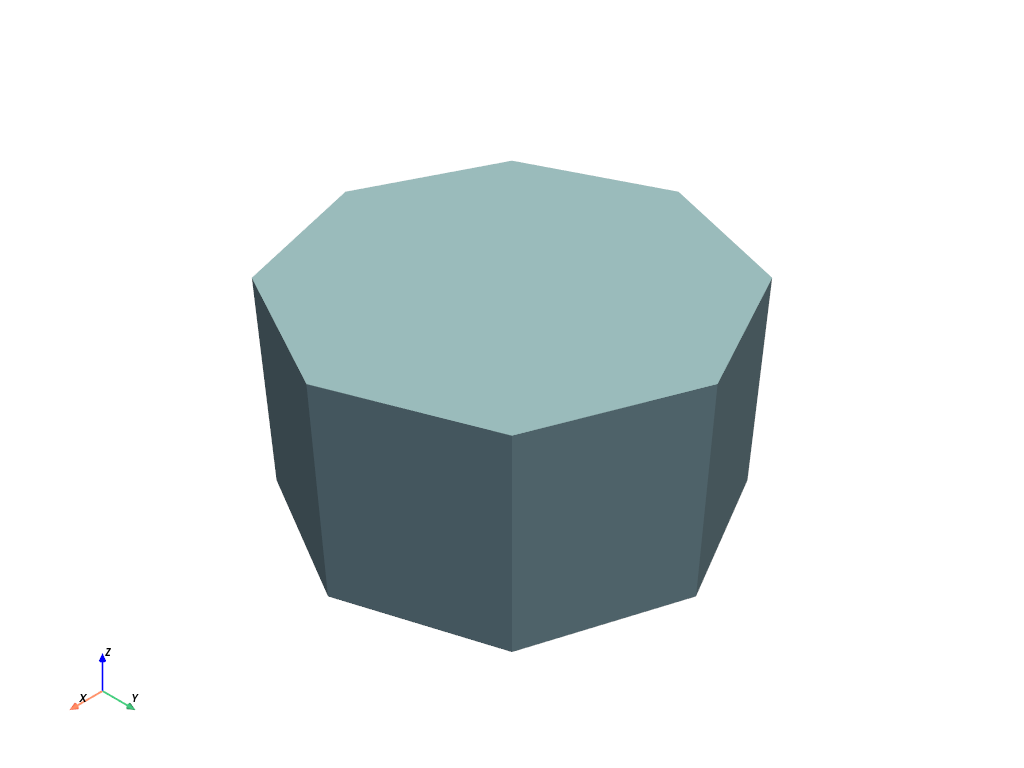

In [4]:
shape.mesh_pyvista.plot()

Every shape can be modified using the following (+native Blender modifiers):
* `translate`
* `rotate`
* `scale`
* `smooth_edges`

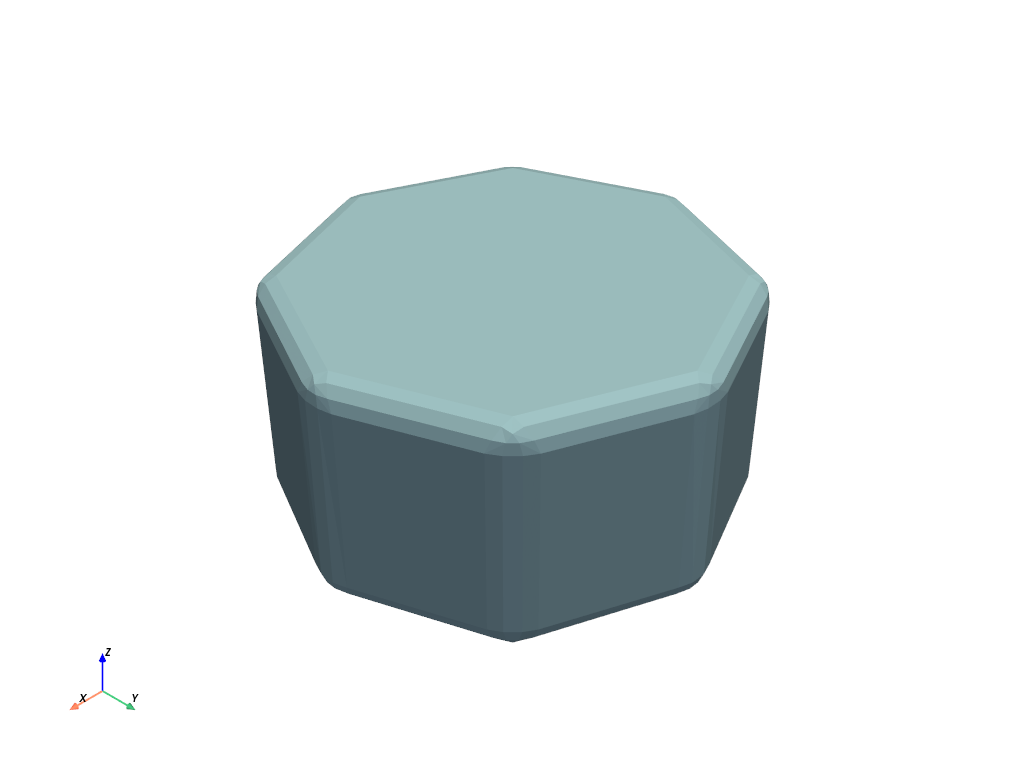

In [5]:
with ng.Scene():
    shape = ng.shapes.basic.Cylinder(diameter=2, height=1, vertices=8)
    shape.smooth_edges(degree=0.05)
    shape.mesh_pyvista.plot()

## Use PyVista to export as STL, PLY or VTK mesh

In [ ]:
shape.mesh_pyvista.save('shape.stl')

# Automatic randomization
FCC shapes are also implemented as a randomized generator containing reasonable ranges of variable shape parameters (aspect ratio, smoothing degree, etc.)

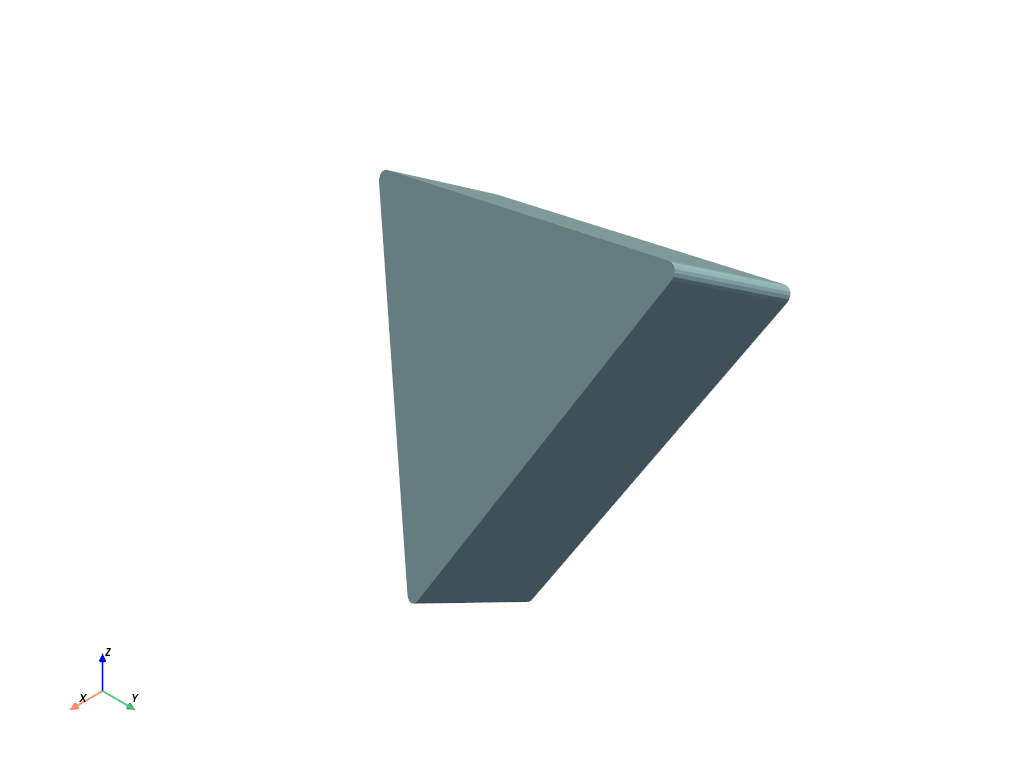

In [13]:
with ng.Scene() as scene:
    shape = scene.add_random_shape(shape_package=ng.shapes.randomized.fcc)
    shape.mesh_pyvista.plot()

# Core-shell particles
A suitable subset of FCC shapes can also be automatically combined into a core-shell structure

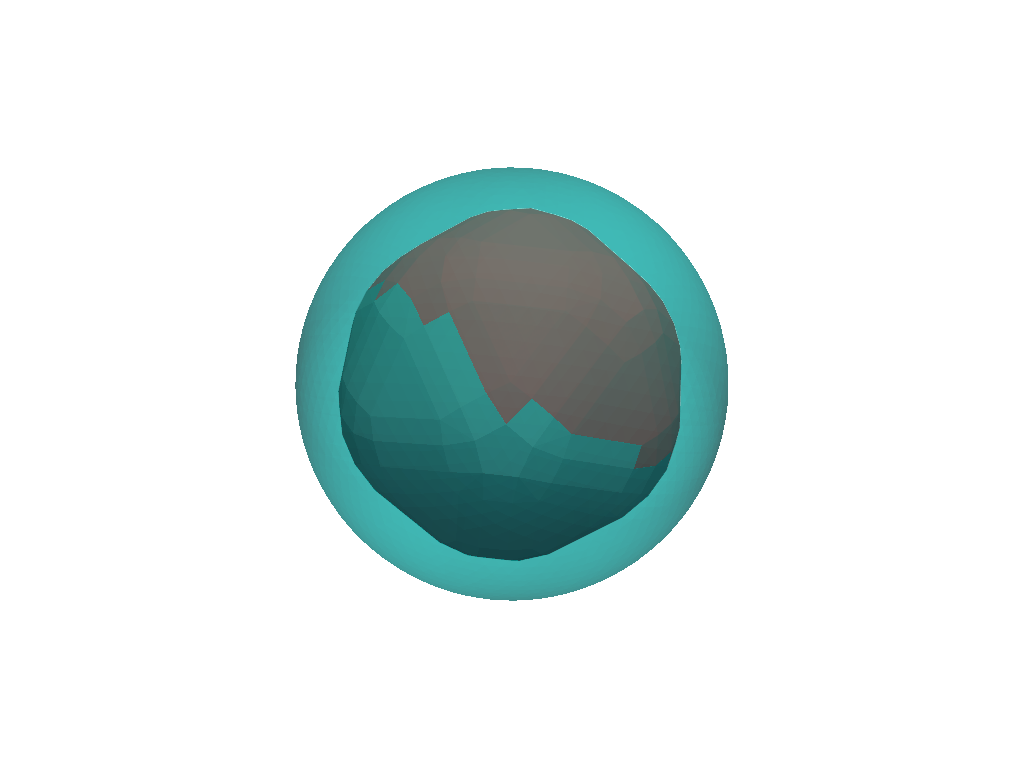

In [6]:
with ng.Scene() as scene:
    core, shell = scene.add_random_core_shell_shape(shape_package=ng.shapes.randomized.fcc)
    plotter = pv.Plotter()
    plotter.add_mesh(shell.mesh_pyvista, opacity=0.5, color='cyan')
    plotter.add_mesh(core.mesh_pyvista, color='red')
    plotter.show()